# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from skimage.filters import gaussian



In [2]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

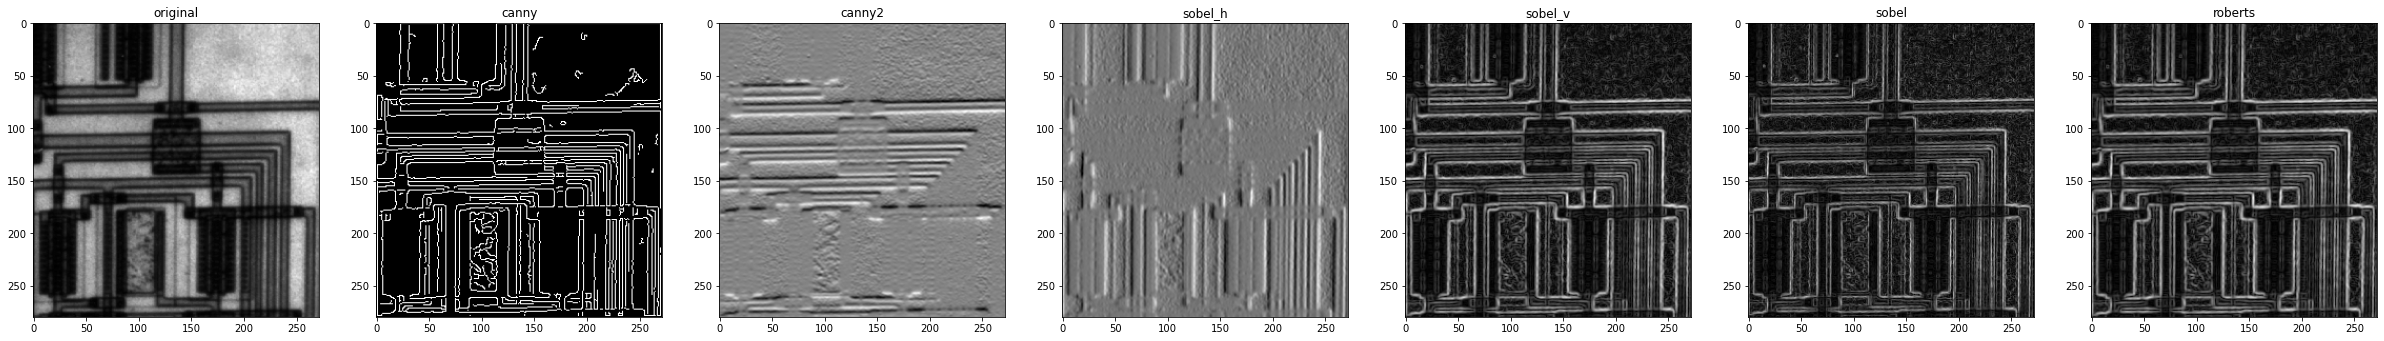

In [8]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

#img = rgb2gray(io.imread('circuit.tif'))

img = (io.imread('circuit.tif'))
img_canny=canny(img)
#img_canny2=canny(img,sigma=,low_threshold=,high_threshold=)
sobel_h_canny=sobel_h(img)
sobel_v_canny=sobel_v(img)
sobel_canny=sobel(img)
roberts_canny=roberts(img)
prewitt_canny=prewitt(img)

sobel_h, sobel, sobel_v,roberts, prewitt
show_images([img,img_canny,sobel_h_canny,sobel_v_canny,sobel_canny,roberts_canny,prewitt_canny],
            ['original','canny','canny2','sobel_h','sobel_v','sobel','roberts','prewitt'])

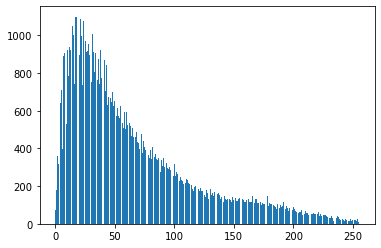

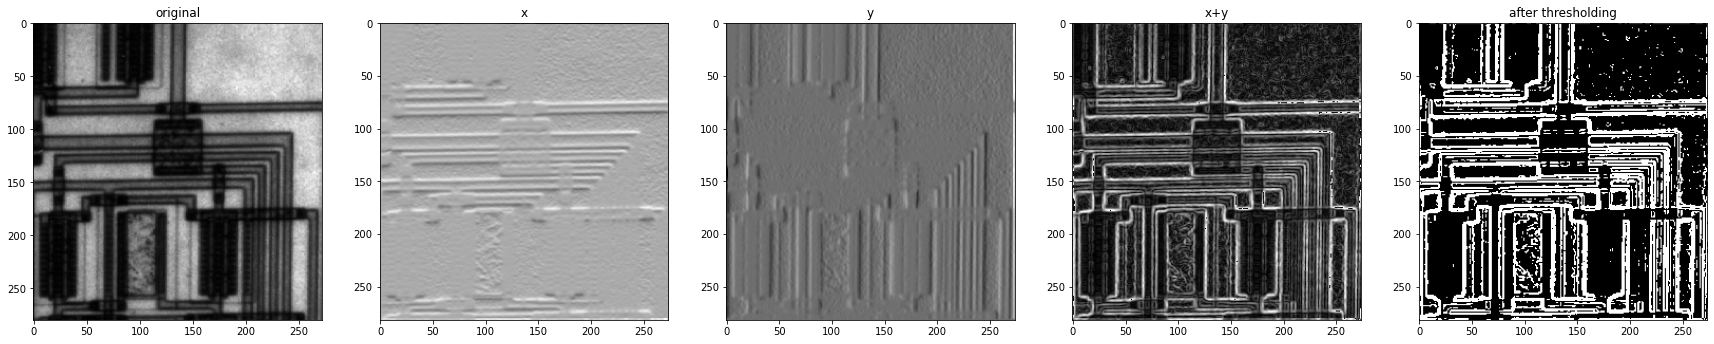

In [4]:
# 2. Custom Sobel (V-H-Both)

img = io.imread('circuit.tif')

Hy= np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])     

Hx= np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])   
img_x=convolve2d(img,Hx)
img_y=convolve2d(img,Hy)
img_xy=np.sqrt(np.square(img_x)+np.square(img_y))
img_xy=img_xy.astype(np.uint8)

showHist(img_xy)

data_final_1 = []
data_final_1 = np.zeros((img_xy.shape[0],img_xy.shape[1]))
data_final_1 = np.where((img_xy>75),255,0)

show_images(images=[img,img_x,img_y,img_xy,data_final_1],titles=["original","x","y","x+y","after thresholding"])


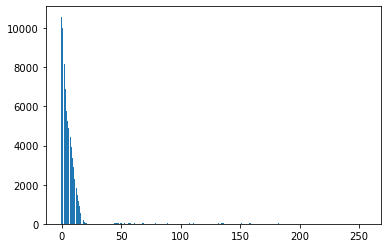

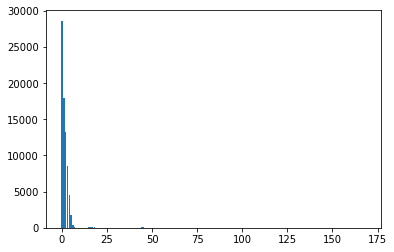

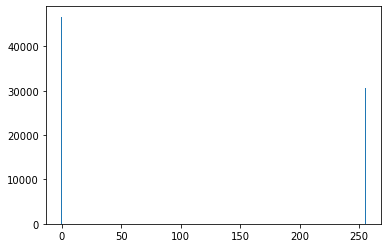

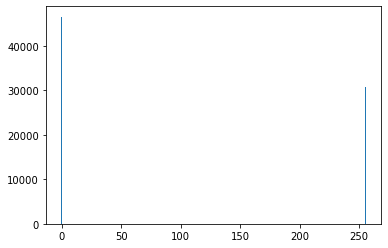

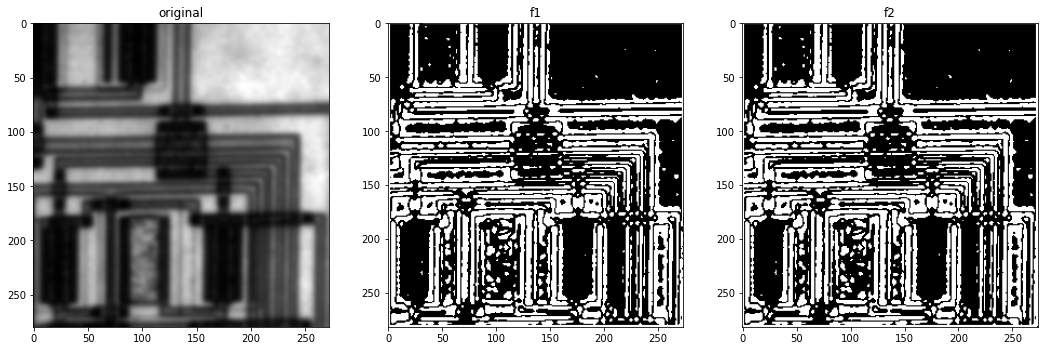

In [5]:
# 3. Custom LoG
img = io.imread('circuit.tif')

img=gaussian(img, sigma=2)
img=img*255
f1= np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])     

f2= np.array([
    [0,1,0,],
    [1,-4,1 ],
    [0,1,0,]
])   
img_1=abs(convolve2d(img,f1))
img_2=abs(convolve2d(img,f2))

img_1= img_1.astype(np.uint8)
img_2= img_2.astype(np.uint8)

# print(img_1.max())
# print(img_2.max())

showHist(img_1)
showHist(img_2)

data_final_1 = []
data_final_1 = np.zeros((img_1.shape[0],img_1.shape[1]))
data_final_1 = np.where(abs(img_1)>5,255,0)
data_2 = []
data_2 = np.zeros((img_2.shape[0],img_2.shape[1]))
data_2 = np.where((abs(img_2)>1.8),255,0)
   
showHist(data_final_1)
showHist(data_2)

show_images(images=[img,data_final_1,data_2],titles=["original","f1","f2"])


In [6]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

'\nOptional\n1-Make edge detection\n2-Multiply by factor < 1\n3-Subtract (Orginal Image) - (Edge Detection Image)\n'